In [1]:
import sympy as sp
import pandas as pd
from sympy import *
init_printing()
from IPython.display import display, Latex

## Assignment 1

In [29]:
# a)

# a. 𝐴 is not invertible - TRUE
# b. 𝐴 is in echelon form - FALSE
# c. 𝑁𝑢𝑙𝑙𝑖𝑡𝑦 𝐴 = 1 - TRUE
# d. 𝑅𝑎𝑛𝑘 𝐴 = 3 - TRUE
# e. 𝑁𝑢𝑙𝑙𝑖𝑡𝑦 𝐴 + 𝑟𝑎𝑛𝑘 𝐴 = 6 - FALSE
# f. The number 0 is an eigenvalue of 𝐴 - TRUE
# g. 𝐴 is in reduced echelon form - FALSE
# h. There exists a vector 𝑥̅∈ℝ4 such that 𝐴𝑥̅=𝑏̅ is not consistent - FALSE
# i. det𝐴=0 - TRUE

In [30]:
# b) 2

In [31]:
# c) distinct nonzero eigenvectors, therefore pivots in all columns, hence invertible, and they are distinct hence
#    diagonalizable

## Assignment 2

 A basis for the eigenspace of -1:


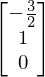

 A basis for the eigenspace of 1:


In [32]:
# a) The eigenvalues of A are -1 and 1 where the latter has multiplicity 2.

# Eigenspaces

A = Matrix([
      [1, 3, 1]
    , [0, -1, 0]
    , [0, 0, 1]
])

eig1 , eig2 = A.eigenvects()
print(" A basis for the eigenspace of -1:")
display(eig1[2][0])
print(" A basis for the eigenspace of 1:")
display(eig2[2][0])

In [33]:
# b) Since the dimension of the eigenspace of 1 is 1, and the multiplicity of 1 is 2, A is not diagonalizable.

## Assignment 3

In [34]:
# a)
A = Matrix([[3, 5, -4], [-3, -2, 4], [6, 1, -8]])
b = Matrix([7, -1, -4])
x, y, z = symbols('x y z')
var = Matrix([x, y, z])
display(Latex("$${}{} = {}$$".format(latex(A), latex(var), latex(b))))

<IPython.core.display.Latex object>

Augmented matrix:


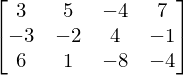

Echelon form:


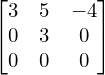

In [35]:
# b)
print("Augmented matrix:")
A_aug = A.row_join(b)
display(A_aug)

print("Echelon form:")
L, U, perm = A.LUdecomposition()
display(U)

From the echelon form we conclude that column three is a non-pivot column, which means $z$ is a free variable.

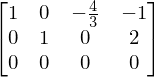

In [36]:
# c)
A_aug_rref, _ = A_aug.rref()
A_aug_rref

In [37]:
z_vec = Matrix([Rational(4,3), 0, 1])
cons = Matrix([A_aug_rref[:,3]])
display(Latex("$$x = {} + z{}$$".format(latex(cons), latex(z_vec))))

<IPython.core.display.Latex object>

In [38]:
# d) In part b) we showed that the coefficient matrix A has a non-pivot column.
#    This means that the matrix is non-invertible and hence does not have an inverse.

## Assignment 4

In [39]:
a, b, c, d = symbols('a b c d')

In [40]:
M = Matrix([[a, 0, d, c], [b, 0, -c, d], [0, c, -b, a], [0, d, a, b]])

# Co-factor expansion on second column
solve(M[0,1]*M.cofactor(0,1)+M[1,1]*M.cofactor(1,1)+
      M[2,1]*M.cofactor(2,1)+M[3,1]*M.cofactor(3,1), a, b, c, d)

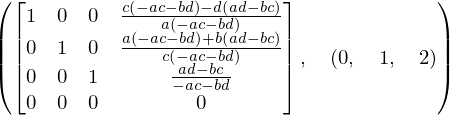

In [41]:
# or
M.rref()

Since there is a zero on the diagonal, the determinant will always be zero.

## Assignment 5

In [43]:
# a)
a = symbols('a')
A = Matrix([
      [a, 3, -1, 0, -2]
    , [0, 2, -4, -1, -6]
    , [-2, -6, 2, 3, 9]
    , [3, 7, -3, 8, -7]
    , [3, 5, 5, 2, 7]  
])
var = solve(A.det()-24,a)
display(Latex("$$a = {}$$".format(var[0])))

<IPython.core.display.Latex object>

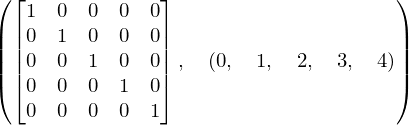

In [44]:
# b)
A = Matrix([
      [1, 3, -1, 0, -2]
    , [0, 2, -4, -1, -6]
    , [-2, -6, 2, 3, 9]
    , [3, 7, -3, 8, -7]
    , [3, 5, 5, 2, 7]  
])

A.rref()

Since we have pivots in all columns, the columns of A necessarily form a basis for $\mathbb{R}^5$

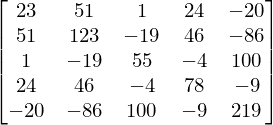

In [45]:
# c)
A.T*A

Had $A$ been an orthogonal basis, the off-diagonals would have been 0's. To figure out which columns are orthogonal, we need to find the inner product between them. The dot products can be read in the above matrix which is called the Gramian Matrix. The dot product between columns $i$ and $j$, is exactly the entry in entry $i,j$ (and/or $j,i$). So the dot product between column 1 and 2 is 51. Since none of the off-diagonals are zero, none of the columns are orthogonal.

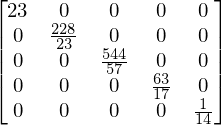

In [46]:
# Gram Schmidt
u1 = A[:,0]
u2 = A[:,1]-A[:,1].project(u1)
u3 = A[:,2]-A[:,2].project(u1)-A[:,2].project(u2)
u4 = A[:,3]-A[:,3].project(u1)-A[:,3].project(u2)-A[:,3].project(u3)
u5 = A[:,4]-A[:,4].project(u1)-A[:,4].project(u2)-A[:,4].project(u3)-A[:,4].project(u4)
U = u1.row_join(u2).row_join(u3).row_join(u4).row_join(u5)
U.T*U

Since the off-diagonals are all 0's, we conclude that $U$ is an orthogonal basis.

## Assignment 6

In [47]:
import sympy as sp
from sympy import *
init_printing()
from IPython.display import display, Latex

In [48]:
from scipy.io import loadmat
Data = loadmat("ALI2018_6.mat")
Data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CPU', 'Order_lines_per_day'])

In [49]:
x = Data['Order_lines_per_day']
y = Data['CPU']
x = x.astype(float)

In [50]:
# a) Design matrix for linear model

X1 = Matrix([ones(len(x),1)]).row_join(Matrix(x))
XtX = X1.T*X1
Xty = X1.T*Matrix(y)
Mat, _ = XtX.row_join(Xty).rref()
B1 = Mat[:,-1]
display(Latex("$$y_1(x) = {}+{}x$$".format(round(B1[0],2), round(B1[1], 4))))

<IPython.core.display.Latex object>

In [51]:
# a) Design matrix for quadratic model

X2 = Matrix([ones(len(x),1)]).row_join(Matrix(x)).row_join(Matrix(x**2))
XtX = X2.T*X2
Xty = X2.T*Matrix(y)
Mat, _ = XtX.row_join(Xty).rref()
B2 = Mat[:,-1]
display(Latex("$$y_2(x) = {}+{}x{}x^2$$"
              .format(round(B2[0],2), round(B2[1], 4), round(B2[2], 4))))

<IPython.core.display.Latex object>

In [52]:
# We see that the coefficient for the quadratic part is very small. It's actual value is
B2[2]

In [53]:
# b)

display(Latex(
    "The error of the linear model is {}, and the error of the quadratic is model {}."
    " We conclude that the quadratic model has the best fit for this specific data."
    .format(round((y-X1*B1).norm(), 2), round((y-X2*B2).norm(), 2))))

<IPython.core.display.Latex object>

In [54]:
# c)

display(Latex("$$y_2(20000) = {}$$".format(round(B2[0]+B2[1]*20000+B2[2]*20000**2, 2))))

<IPython.core.display.Latex object>

## Assignment 7

In [99]:
# This assignment had no (real) solution. Will be explained in class.